In [87]:
import sys
import numpy as np
import pandas as pd
import seaborn as sb
import pickle
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,precision_recall_fscore_support
import sklearn.metrics as metrics

In [88]:
dataset=pd.read_csv("flightdata.csv")
dataset

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11226,2016,4,12,30,5,DL,N940DL,1715,11433,DTW,...,1223,1148.0,-35.0,0.0,0.0,0.0,138.0,105.0,594.0,NaN
11227,2016,4,12,30,5,DL,N836DN,1770,14747,SEA,...,2046,2100.0,14.0,0.0,0.0,0.0,201.0,181.0,1399.0,NaN
11228,2016,4,12,30,5,DL,N583NW,1823,11433,DTW,...,2210,2154.0,-16.0,0.0,0.0,0.0,311.0,295.0,1927.0,NaN
11229,2016,4,12,30,5,DL,N554NW,1901,10397,ATL,...,1806,1801.0,-5.0,0.0,0.0,0.0,336.0,332.0,2182.0,NaN


In [89]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 11231 non-null  int64  
 1   QUARTER              11231 non-null  int64  
 2   MONTH                11231 non-null  int64  
 3   DAY_OF_MONTH         11231 non-null  int64  
 4   DAY_OF_WEEK          11231 non-null  int64  
 5   UNIQUE_CARRIER       11231 non-null  object 
 6   TAIL_NUM             11231 non-null  object 
 7   FL_NUM               11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID    11231 non-null  int64  
 9   ORIGIN               11231 non-null  object 
 10  DEST_AIRPORT_ID      11231 non-null  int64  
 11  DEST                 11231 non-null  object 
 12  CRS_DEP_TIME         11231 non-null  int64  
 13  DEP_TIME             11124 non-null  float64
 14  DEP_DELAY            11124 non-null  float64
 15  DEP_DEL15            11124 non-null 

# Performing Univariate Analysis

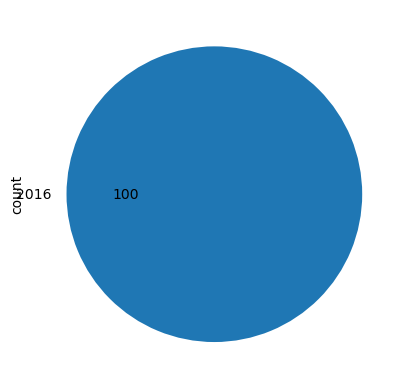

In [90]:
#using pie chart
dataset["YEAR"].value_counts().plot(kind="pie",autopct="%.0f")
plt.show()

# Performing Bivariate Analysis

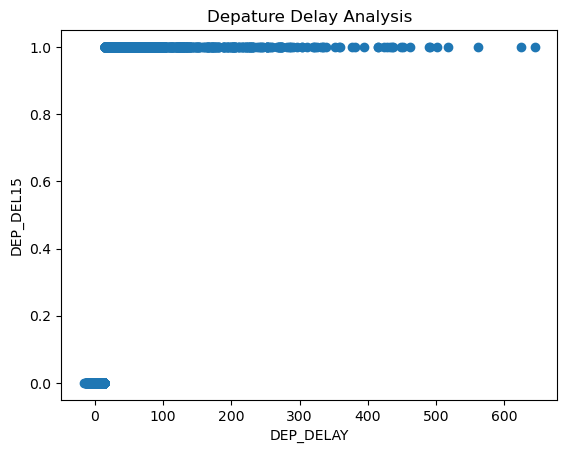

In [91]:
# using scatterplot
plt.scatter(dataset.DEP_DELAY,dataset.DEP_DEL15)
plt.title("Depature Delay Analysis")
plt.xlabel("DEP_DELAY")
plt.ylabel("DEP_DEL15");
plt.show()

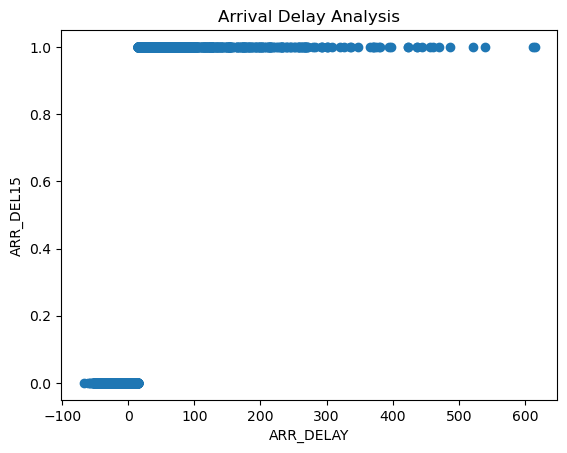

In [92]:
plt.scatter(dataset.ARR_DELAY,dataset.ARR_DEL15)
plt.title("Arrival Delay Analysis")
plt.xlabel("ARR_DELAY")
plt.ylabel("ARR_DEL15");
plt.show()

# Using Heatmap

C:\Users\gvenk\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


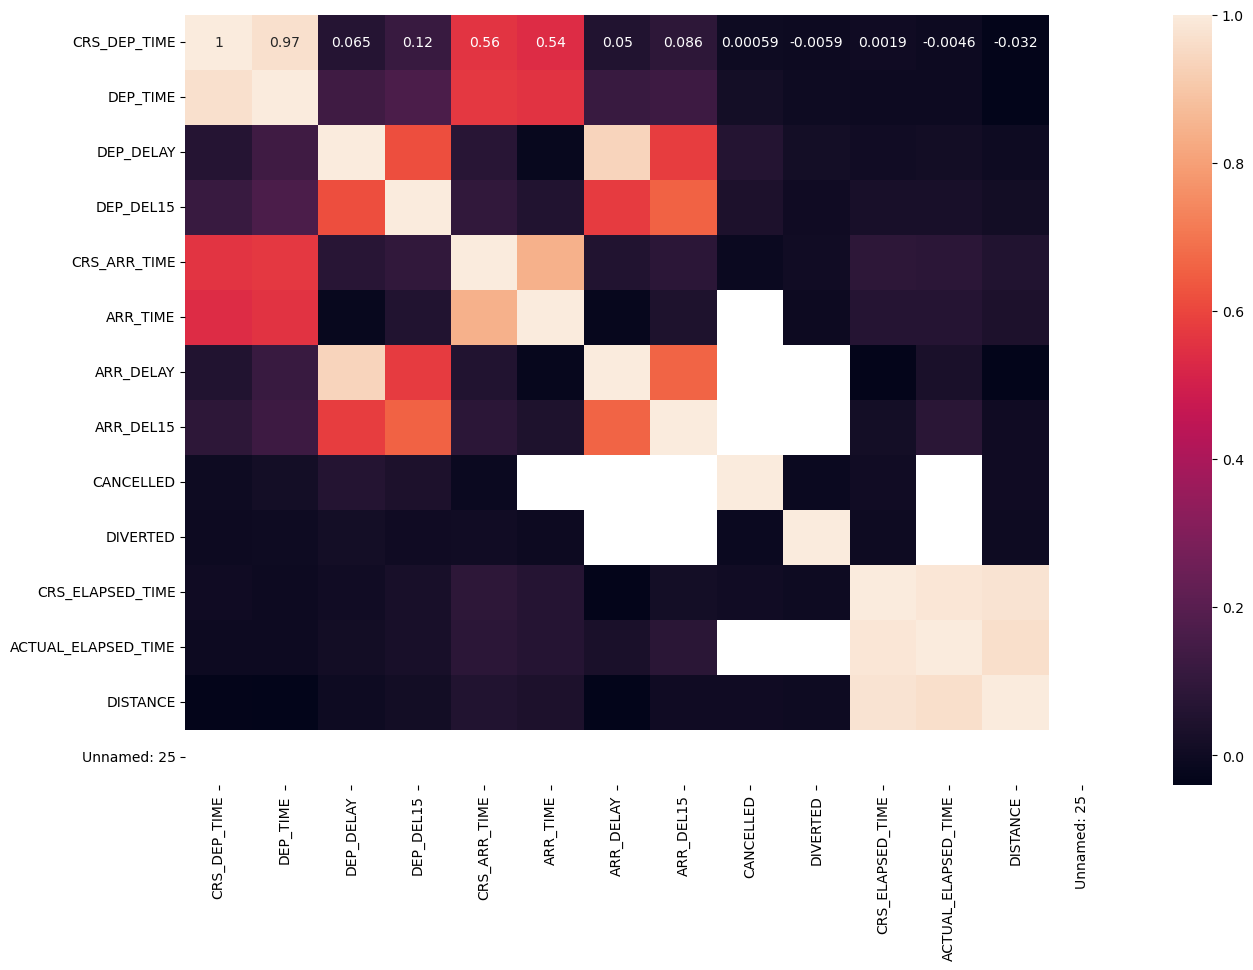

In [93]:
fig,ax=plt.subplots(figsize=(15,10))
sb.heatmap(dataset.iloc[:,12:].corr(),annot=True,ax=ax)
plt.show()

# Exploratory Data Analysis(EDA)

In [94]:
dataset.describe()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
count,11231.0,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11124.000000,...,11231.000000,11116.000000,11043.000000,11043.000000,11231.000000,11231.000000,11231.000000,11043.000000,11231.000000,0.0
mean,2016.0,2.544475,6.628973,15.790758,3.960199,1334.325617,12334.516695,12302.274508,1320.798326,1327.189410,...,1537.312795,1523.978499,-2.573123,0.124513,0.010150,0.006589,190.652124,179.661233,1161.031965,NaN
std,0.0,1.090701,3.354678,8.782056,1.995257,811.875227,1595.026510,1601.988550,490.737845,500.306462,...,502.512494,512.536041,39.232521,0.330181,0.100241,0.080908,78.386317,77.940399,643.683379,NaN
min,2016.0,1.000000,1.000000,1.000000,1.000000,7.000000,10397.000000,10397.000000,10.000000,1.000000,...,2.000000,1.000000,-67.000000,0.000000,0.000000,0.000000,93.000000,75.000000,509.000000,NaN
25%,2016.0,2.000000,4.000000,8.000000,2.000000,624.000000,10397.000000,10397.000000,905.000000,905.000000,...,1130.000000,1135.000000,-19.000000,0.000000,0.000000,0.000000,127.000000,117.000000,594.000000,NaN
50%,2016.0,3.000000,7.000000,16.000000,4.000000,1267.000000,12478.000000,12478.000000,1320.000000,1324.000000,...,1559.000000,1547.000000,-10.000000,0.000000,0.000000,0.000000,159.000000,149.000000,907.000000,NaN
75%,2016.0,3.000000,9.000000,23.000000,6.000000,2032.000000,13487.000000,13487.000000,1735.000000,1739.000000,...,1952.000000,1945.000000,1.000000,0.000000,0.000000,0.000000,255.000000,236.000000,1927.000000,NaN
max,2016.0,4.000000,12.000000,31.000000,7.000000,2853.000000,14747.000000,14747.000000,2359.000000,2400.000000,...,2359.000000,2400.000000,615.000000,1.000000,1.000000,1.000000,397.000000,428.000000,2422.000000,NaN


# Dropping Unnecessary Columns

In [95]:
dataset=dataset[["FL_NUM","MONTH","DAY_OF_MONTH","DAY_OF_WEEK","ORIGIN","DEST","DEP_DEL15","CRS_ARR_TIME","ARR_DEL15"]]
dataset.head()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_DEL15,CRS_ARR_TIME,ARR_DEL15
0,1399,1,1,5,ATL,SEA,0.0,2143,0.0
1,1476,1,1,5,DTW,MSP,0.0,1435,0.0
2,1597,1,1,5,ATL,SEA,0.0,1215,0.0
3,1768,1,1,5,SEA,MSP,0.0,1335,0.0
4,1823,1,1,5,SEA,DTW,0.0,607,0.0


In [96]:
import math
for index,row in dataset.iterrows():
    dataset.loc[index,"CRS_ARR_TIME"]=math.floor(row["CRS_ARR_TIME"]/100)
dataset.head(15)

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_DEL15,CRS_ARR_TIME,ARR_DEL15
0,1399,1,1,5,ATL,SEA,0.0,21,0.0
1,1476,1,1,5,DTW,MSP,0.0,14,0.0
2,1597,1,1,5,ATL,SEA,0.0,12,0.0
3,1768,1,1,5,SEA,MSP,0.0,13,0.0
4,1823,1,1,5,SEA,DTW,0.0,6,0.0
5,1975,1,1,5,MSP,ATL,0.0,14,0.0
6,2074,1,2,6,ATL,MSP,0.0,19,0.0
7,2151,1,2,6,MSP,SEA,0.0,19,0.0
8,2221,1,2,6,MSP,SEA,0.0,13,0.0
9,2291,1,2,6,MSP,ATL,0.0,18,0.0


In [97]:
dataset["ARR_DEL15"].value_counts()

ARR_DEL15
0.0    9668
1.0    1375
Name: count, dtype: int64

# Handling Missing Values

In [98]:
dataset.isnull().sum()
dataset.describe()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DEL15,CRS_ARR_TIME,ARR_DEL15
count,11231.000000,11231.000000,11231.000000,11231.000000,11124.000000,11231.000000,11043.000000
mean,1334.325617,6.628973,15.790758,3.960199,0.142844,15.067314,0.124513
std,811.875227,3.354678,8.782056,1.995257,0.349930,5.023534,0.330181
min,7.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,624.000000,4.000000,8.000000,2.000000,0.000000,11.000000,0.000000
50%,1267.000000,7.000000,16.000000,4.000000,0.000000,15.000000,0.000000
75%,2032.000000,9.000000,23.000000,6.000000,0.000000,19.000000,0.000000
max,2853.000000,12.000000,31.000000,7.000000,1.000000,23.000000,1.000000


# Replacing Null values

In [99]:
dataset=dataset.fillna({'DEP_DEL15':dataset['DEP_DEL15'].mode()[0],
                        'ARR_DEL15':dataset["ARR_DEL15"].mode()[0]})

In [100]:
dataset.isnull().sum()

FL_NUM          0
MONTH           0
DAY_OF_MONTH    0
DAY_OF_WEEK     0
ORIGIN          0
DEST            0
DEP_DEL15       0
CRS_ARR_TIME    0
ARR_DEL15       0
dtype: int64

In [101]:
dataset["ARR_DEL15"].value_counts()

ARR_DEL15
0.0    9856
1.0    1375
Name: count, dtype: int64

# Handling Outliers

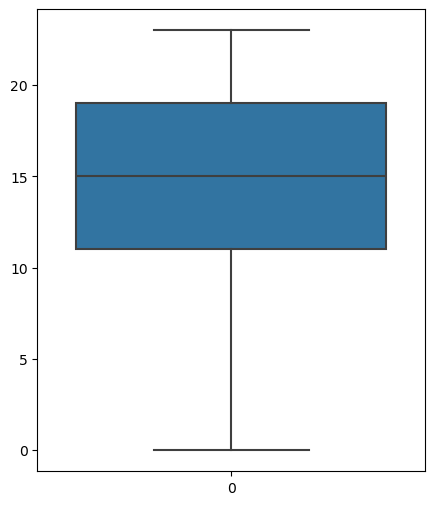

In [102]:
fig, ax=plt.subplots(figsize=(5,6))
sb.boxplot(data=dataset["CRS_ARR_TIME"])
plt.show()

# Handling Categorical Values

### Label Encoding

In [103]:
dataset["DEST"].unique()

array(['SEA', 'MSP', 'DTW', 'ATL', 'JFK'], dtype=object)

In [104]:
le=LabelEncoder()
dataset["DEST"]=le.fit_transform(dataset["DEST"])
dataset["ORIGIN"]=le.fit_transform(dataset["ORIGIN"])
dataset.head()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_DEL15,CRS_ARR_TIME,ARR_DEL15
0,1399,1,1,5,0,4,0.0,21,0.0
1,1476,1,1,5,1,3,0.0,14,0.0
2,1597,1,1,5,0,4,0.0,12,0.0
3,1768,1,1,5,4,3,0.0,13,0.0
4,1823,1,1,5,4,1,0.0,6,0.0


In [105]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FL_NUM        11231 non-null  int64  
 1   MONTH         11231 non-null  int64  
 2   DAY_OF_MONTH  11231 non-null  int64  
 3   DAY_OF_WEEK   11231 non-null  int64  
 4   ORIGIN        11231 non-null  int32  
 5   DEST          11231 non-null  int32  
 6   DEP_DEL15     11231 non-null  float64
 7   CRS_ARR_TIME  11231 non-null  int64  
 8   ARR_DEL15     11231 non-null  float64
dtypes: float64(2), int32(2), int64(5)
memory usage: 702.1 KB


# Splitting Dataset into Independent and Dependent Variables

In [106]:
X=dataset.drop(columns=["ARR_DEL15"]) #independent variables
Y=dataset[["ARR_DEL15"]]#dependent variables
#converting to 1-D array to train model
X=X.values
Y=Y.values

# One Hot Encoding

In [107]:
oh=OneHotEncoder()
z=oh.fit_transform(X[:,4:5]).toarray()
y=oh.fit_transform(X[:,5:6]).toarray()
dataset.tail(15)

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_DEL15,CRS_ARR_TIME,ARR_DEL15
11216,2597,12,28,3,3,0,0.0,10,0.0
11217,2640,12,28,3,0,1,0.0,11,0.0
11218,2835,12,28,3,2,3,1.0,19,1.0
11219,39,12,29,4,1,4,0.0,10,0.0
11220,86,12,29,4,3,1,0.0,16,0.0
11221,200,12,29,4,3,0,0.0,16,0.0
11222,269,12,29,4,4,0,1.0,22,0.0
11223,1410,12,30,5,4,2,0.0,21,0.0
11224,1476,12,30,5,1,3,1.0,14,1.0
11225,1549,12,30,5,3,0,1.0,21,0.0


# Splitting Dataset into Train and Test Datasets

In [108]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [109]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((8984, 8), (2247, 8), (8984, 1), (2247, 1))

# Building The Machine Learning Model

### Logistic Regression

In [110]:
log_reg=LogisticRegression(max_iter=800)
log_reg.fit(X_train,Y_train.ravel())

LogisticRegression(max_iter=800)

# Testing The Model

In [111]:
Y_pred_log_train=log_reg.predict(X_train)
Y_pred_log_test=log_reg.predict(X_test)

In [112]:
pd.DataFrame(Y_pred_log_train).value_counts()

0.0    7705
1.0    1279
Name: count, dtype: int64

# Evaluating The Model Using Metrics

#### Classification Report

In [113]:
print(classification_report(Y_test,Y_pred_log_test))

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96      1973
         1.0       0.69      0.77      0.73       274

    accuracy                           0.93      2247
   macro avg       0.83      0.86      0.84      2247
weighted avg       0.93      0.93      0.93      2247



In [114]:
acc_log=accuracy_score(Y_test,Y_pred_log_test)
prec_log,rec_log,f1_log,sup_log=precision_recall_fscore_support(Y_test,Y_pred_log_test)
print("Accuracy score=",acc_log)
print("Precision=",prec_log[0])
print("Recall=",rec_log[0])
print("F1 score=",f1_log[0])

Accuracy score= 0.9287939474855362
Precision= 0.9675090252707581
Recall= 0.9508362899138368
F1 score= 0.9591002044989776


### Checking for Overfitting and Underfitting

In [115]:
log_train_acc=accuracy_score(Y_train,Y_pred_log_train)
log_test_acc=accuracy_score(Y_test,Y_pred_log_test)
print("Training Accuracy=",log_train_acc)
print("Testing Accuracy=",log_test_acc)

Training Accuracy= 0.9182991985752449
Testing Accuracy= 0.9287939474855362


##### There is no big variation between training and testing accuracy. Therefore the Logistic Regression model is not overfited and underfited

### Confusion Matrix

In [116]:
pd.crosstab(Y_test.ravel(),Y_pred_log_test)

col_0,0.0,1.0
row_0,,
0.0,1876,97
1.0,63,211


# Saving The Model

In [117]:
pickle.dump(log_reg,open("flight.pkl","wb"))

In [118]:
Y_pred=[[1399,1,1,5,0,4,0.0,21]]

In [119]:
log_reg.predict(Y_pred)

array([0.])